In [1]:
##############################
# Solves -u'' = f            #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = -0.5
b = 0.5


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2) * exact(*x)

In [2]:
# Parameters
d = 1
k = 1
inner = 5
outer = 3
start_delta = 1.
start_N = 10

# Computed Parameters
ranges = ((a, b),) * d
centre_thinning = 2 ** np.arange(inner)
delta_thinning = 2 ** np.arange(inner)
xcs = [rad.gridinc(ranges, inc, flat=True) for inc in (b - a) / (centre_thinning * start_N)]
deltas = start_delta / delta_thinning

# Integration
integrator = rad.integrate.MeanIntegrator(ranges, 2000)
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Solve for approximate solution
phis = [rad.Wendland(d, k, delta, xc) for delta, xc in zip(deltas, xcs)]
solver = rad.solve.MultilevelSolver(phis, outer, rad.solve.GalerkinSolver, integrator, 'poisson')
approx = solver.solve(f)
error = rad.error(exact, approx, error_integrator)

print("L2 Relative Error:", error)
print("Condition Numbers:", solver.cond())

L2 Relative Error: 40.46498576681799
Condition Numbers: [62329.47129053733, 177951.29570727458, 283406.8307234626, 358133.92437539663, 392579.9222714469]


/home/keane/Projects/radiant/venv/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


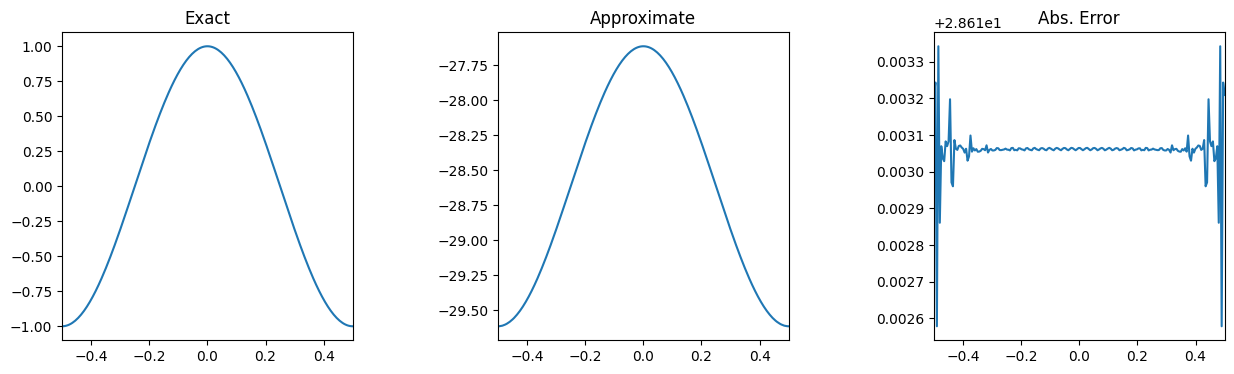

In [3]:
rad.plot.spread(
    ranges,
    exact,
    approx,
    lambda *x: np.abs(exact(*x) - approx(*x)),
    n=200,
    wspace=0.5,
    hspace=0.5,
    titles=["Exact", "Approximate", "Abs. Error"],
    figsize=(15, 4)
)

Once 
 
 Loop 
 
 Reflect

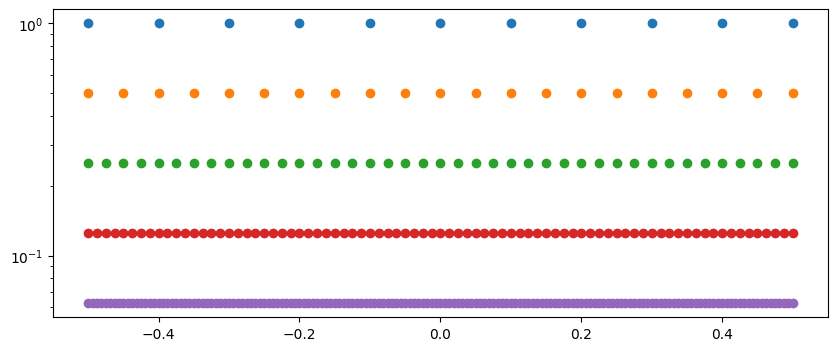

In [4]:
if d == 1:
    from IPython.display import HTML, display_html
    
    
    anim = rad.animate.ml_animate(ranges, exact, approx, n=200, figsize=(10, 4))
    display_html(HTML(anim.to_jshtml()))
    
    rad.plot.thinning(deltas, xcs, d, figsize=(10, 4))